In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from ml_lib import DBSCAN as DBSCANFromTemu, KernelizedSVC
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cdbscan = DBSCANFromTemu(eps=0.2, min_samples=3)
dbscan = DBSCAN(eps=0.2, min_samples=3)

y_pred_cdbscan = cdbscan.fit_predict(X_train)
y_pred_dbscan = dbscan.fit_predict(X_train)

components_cdbscan = cdbscan._components
components_dbscan = dbscan.components_

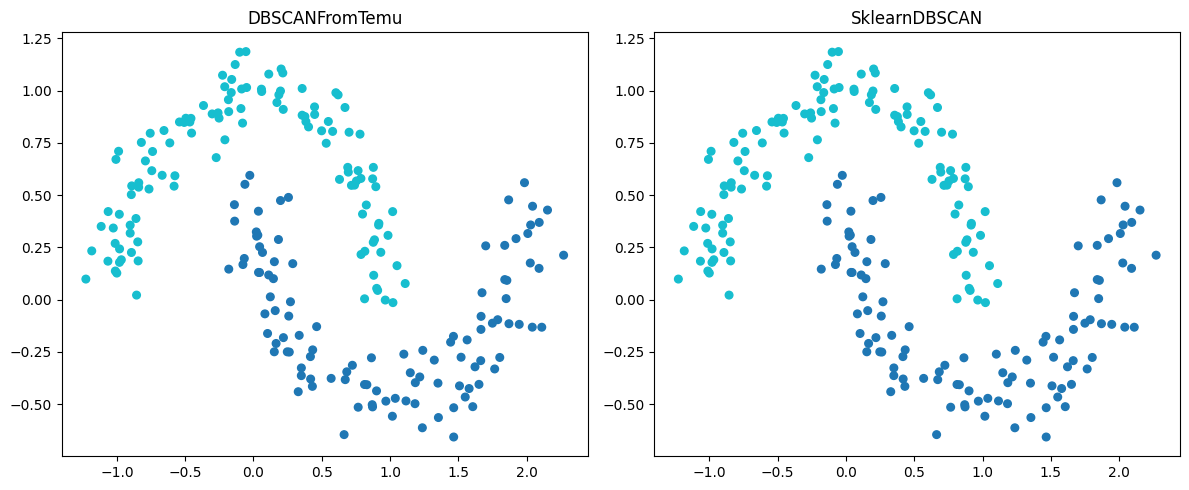

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(*X_train.T, c=y_pred_cdbscan, cmap='tab10', s=30)
# ax1.scatter(*components_cdbscan.T, c='red', s=30)
ax1.set_title("DBSCANFromTemu")

ax2.scatter(*X_train.T, c=y_pred_dbscan, cmap='tab10', s=30)
# ax2.scatter(*components_dbscan.T, c='red', s=30)
ax2.set_title("SklearnDBSCAN")

plt.tight_layout()

In [5]:
print(adjusted_rand_score(y_train, y_pred_cdbscan))
print(adjusted_rand_score(y_train, y_pred_dbscan))
print(silhouette_score(X_train, y_pred_cdbscan))
print(silhouette_score(X_train, y_pred_dbscan))

1.0
1.0
0.29750809335508477
0.29750809335508477


In [6]:
svc = KernelizedSVC()

svc.fit(X_train[cdbscan._components_idxs], y_pred_cdbscan[cdbscan._components_idxs])
pred = svc.predict(X_test)

pred = np.where(pred == 0, 1, 0)

print(accuracy_score(y_test, pred))

1.0
